Question 2: Introduction to Regularization with Ridge Regression<br>
Task: Use Ridge regression on a noisy dataset and evaluate improvements over simple linear
regression due to regularization.

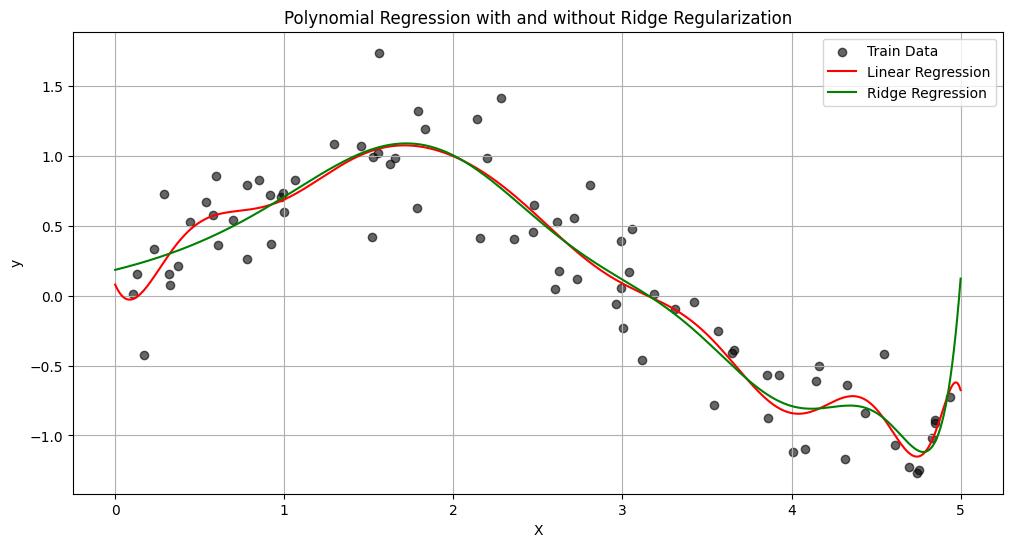

🔴 Linear Regression Test MSE: 0.06977678107275645
🟢 Ridge Regression Test MSE: 0.06446428554856262


In [1]:
# 🧰 Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 🎲 Create a Noisy Non-Linear Dataset
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.3, X.shape[0])

# 🧪 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Polynomial Degree
degree = 15

# 🔹 Linear Regression (Polynomial without regularization)
lin_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# 🔸 Ridge Regression (Polynomial with regularization)
ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# 📈 Plotting
X_plot = np.linspace(0, 5, 500).reshape(-1, 1)
y_lin_plot = lin_model.predict(X_plot)
y_ridge_plot = ridge_model.predict(X_plot)

plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, color='black', label='Train Data', alpha=0.6)
plt.plot(X_plot, y_lin_plot, color='red', label='Linear Regression')
plt.plot(X_plot, y_ridge_plot, color='green', label='Ridge Regression')
plt.title("Polynomial Regression with and without Ridge Regularization")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# 📊 Evaluation
print("🔴 Linear Regression Test MSE:", mean_squared_error(y_test, y_pred_lin))
print("🟢 Ridge Regression Test MSE:", mean_squared_error(y_test, y_pred_ridge))
